In [2]:
print("hello")

hello


In [3]:
pip install dscribe

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 690 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 237 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.0 MB 4.1 MB/s eta 0:00:01     |████████████████████████▋       | 8.4 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 24.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 17.9 MB/s eta 0:00:01    |█████████████████████▊          | 20.6 MB 9.2 MB/s eta 0:00:02
     |████████████████████████████████| 7.8 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 15.0 MB/s eta 0:00:01
     |█████████████████████████

In [3]:
import numpy as np
from ase.build import molecule
from dscribe.descriptors import SOAP
from dscribe.descriptors import CoulombMatrix

# Define atomic structures
samples = [molecule("H2O"), molecule("NO2"), molecule("CO2")]

soap_desc = SOAP(species=["C", "H", "O", "N"], r_cut=5, n_max=8, l_max=6)
water = samples[0]
soap = soap_desc.create(water, centers=[0])
print(soap)

[[0.01101141 0.04291005 0.10878363 ... 0.         0.         0.        ]]


In [1]:
from ase.io import Trajectory, write, read
import pickle
import numpy as np
from ase.build import molecule
from dscribe.descriptors import SOAP
from dscribe.descriptors import CoulombMatrix

mace=read('./mace_original_atoms.xyz')
O_indices=[atom.index for atom in mace if atom.symbol=='O']
Ce_indices=[atom.index for atom in mace if atom.symbol=='Ce']
print(len(O_indices))
soap_desc = SOAP(species=["Ce","O"], r_cut=5, n_max=8, l_max=6, periodic=True)
mace_soap = soap_desc.create(mace)
print(len(mace_soap[0]))
print(mace_soap)
print("Shape of mace_soap:", np.shape(mace_soap))

with open('soap_descriptors.pkl', 'wb') as f:
    pickle.dump(mace_soap, f)
print("SOAP descriptors successfully saved to 'soap_descriptors.pkl'.")

2446
952
[[ 3.94332254e-03  4.52807920e-03  5.77053436e-02 ...  4.20082763e+00
  -4.02718950e+00  3.86228901e+00]
 [ 2.44778911e-03  2.40243775e-03  3.58508602e-02 ...  1.51539941e+00
  -1.54498750e+00  1.57873105e+00]
 [ 2.28544131e-03  2.26822124e-03  3.41580724e-02 ...  1.68489765e+00
  -1.61244008e+00  1.54389469e+00]
 ...
 [ 1.04025892e-02  4.73112480e-02  7.80694322e-02 ...  1.47701349e-01
  -1.44023887e-01  1.64925304e-01]
 [ 1.01141747e-02  4.71457484e-02  7.38909992e-02 ...  4.56732880e-01
  -4.29685056e-01  4.22343311e-01]
 [ 1.00381398e-02  4.68350849e-02  7.31915839e-02 ...  2.19547622e-01
  -1.82128059e-01  1.74370588e-01]]
Shape of mace_soap: (3671, 952)
SOAP descriptors successfully saved to 'soap_descriptors.pkl'.


In [4]:
mace

Atoms(symbols='Ce1225O2446', pbc=True, cell=[[55.15350491259771, 0.0, 3.680226501607361e-05], [4.2289392269873974e-05, 55.71345269068901, -1.7880089403309766e-05], [0.0, 0.0, 55.15350439280487]], momenta=..., calculator=SinglePointCalculator(...))

In [8]:
from ase.neighborlist import natural_cutoffs, NeighborList

# Create the neighbor list
cutoffs = natural_cutoffs(mace)
print(cutoffs)
neighbour_list = NeighborList(cutoffs, bothways=True, self_interaction=False)
neighbour_list.update(mace)

# Get neighbors for the first atom and print the shape
neighbors = neighbour_list.get_neighbors(0)
print("Neighbors for atom 0:", neighbors)
print("Shape of neighbor list:", len(neighbors[0]))  # Number of neighbors for atom 0

[np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(2.04), np.float64(0.66), np.float64(0.66), np.float64(0.66), np.float6

In [9]:
from ase.neighborlist import NeighborList
import numpy as np

def get_ce_o_information(atoms, cutoff=3.0):
    # Create a neighbor list with a fixed cutoff
    cutoffs = [cutoff] * len(atoms)
    nl = NeighborList(cutoffs, bothways=True, self_interaction=False)
    nl.update(atoms)

    Ce_indices = [atom.index for atom in atoms if atom.symbol == 'Ce']
    O_indices = [atom.index for atom in atoms if atom.symbol == 'O']

    Ce_dictionary = {}
    O_dictionary = {}

    # Get neighbors for Ce atoms
    for ce_index in Ce_indices:
        indices, offsets = nl.get_neighbors(ce_index)
        neighbor_o_indices = [i for i in indices if atoms[i].symbol == 'O']
        bond_num = len(neighbor_o_indices)
        Ce_dictionary[ce_index] = {
            "ce": np.round(atoms[ce_index].position, 2),
            "nei": bond_num,
            "nei_index": neighbor_o_indices
        }

    # Get neighbors for O atoms
    for o_index in O_indices:
        indices, offsets = nl.get_neighbors(o_index)
        neighbor_ce_indices = [i for i in indices if atoms[i].symbol == 'Ce']
        bond_num = len(neighbor_ce_indices)
        O_dictionary[o_index] = {
            "o": np.round(atoms[o_index].position, 2),
            "nei": bond_num,
            "nei_index": neighbor_ce_indices
        }

    return Ce_dictionary, O_dictionary

Ce_dictionary_ase, O_dictionary_ase = get_ce_o_information(mace)


In [10]:
Ce_dictionary_ase

{0: {'ce': array([3.94, 0.  , 1.97]),
  'nei': 44,
  'nei_index': [np.int64(10),
   np.int64(11),
   np.int64(7),
   np.int64(6),
   np.int64(9),
   np.int64(8),
   np.int64(5),
   np.int64(4),
   np.int64(130),
   np.int64(131),
   np.int64(127),
   np.int64(126),
   np.int64(129),
   np.int64(251),
   np.int64(128),
   np.int64(125),
   np.int64(124),
   np.int64(247),
   np.int64(250),
   np.int64(112),
   np.int64(113),
   np.int64(114),
   np.int64(115),
   np.int64(116),
   np.int64(117),
   np.int64(118),
   np.int64(119),
   np.int64(232),
   np.int64(233),
   np.int64(234),
   np.int64(235),
   np.int64(236),
   np.int64(237),
   np.int64(238),
   np.int64(239),
   np.int64(357),
   np.int64(358),
   np.int64(359),
   np.int64(1564),
   np.int64(1565),
   np.int64(1567),
   np.int64(1672),
   np.int64(1673),
   np.int64(1677)]},
 1: {'ce': array([ 3.94, -0.  ,  5.6 ]),
  'nei': 34,
  'nei_index': [np.int64(114),
   np.int64(113),
   np.int64(115),
   np.int64(235),
   np.int64

In [21]:
from scipy.spatial import cKDTree
import numpy as np

def near_Ce_information(Atoms,cut=3):
    Ce_indices = [atom.index for atom in Atoms if atom.symbol == 'Ce']

    # Extract positions and symbols
    positions = Atoms.positions
    symbols = Atoms.symbols

    # Extract Ce and O positions separately
    ce_positions = positions[Ce_indices]
    o_positions = positions[symbols == 'O']

    # Create a KD-tree for O positions
    tree = cKDTree(o_positions)
    cutoff = cut  # Ce-O cutoff
    Ce_dictionary = {}

    for ce_index, ce_pos in zip(Ce_indices, ce_positions):
        # Query the KD-tree for O atoms within the cutoff distance
        neighbor_o_indices = tree.query_ball_point(ce_pos, cutoff)
        bond_num = len(neighbor_o_indices)

        # Store information using ce_index as the key
        Ce_dictionary[ce_index] = {"ce": np.round(ce_pos, 2), "nei": bond_num,"nei_index":neighbor_o_indices}
    return Ce_dictionary

def near_O_information(Atoms,cut=3):
    O_indices = [atom.index for atom in Atoms if atom.symbol == 'O']

    # Extract positions and symbols
    positions = Atoms.positions
    symbols = Atoms.symbols

    # Extract O and Ce positions separately
    o_positions = positions[O_indices]
    ce_positions = positions[symbols == 'Ce']

    # Create a KD-tree for Ce positions
    tree = cKDTree(ce_positions)
    cutoff = cut  # O-Ce cutoff
    O_dictionary = {}

    for o_index, o_pos in zip(O_indices, o_positions):
        # Query the KD-tree for Ce atoms within the cutoff distance
        neighbor_ce_indices = tree.query_ball_point(o_pos, cutoff)
        bond_num = len(neighbor_ce_indices)

        # Store information using o_index as the key
        O_dictionary[o_index] = {"o": np.round(o_pos, 2), "nei": bond_num, "nei_index": neighbor_ce_indices}

    return O_dictionary
Ce_dictionary = near_Ce_information(mace)
O_dictionary = near_O_information(mace)
print(len(Ce_dictionary))
print(len(O_dictionary))


1225
2446


In [27]:
import pickle
file_name = '../../resources/hist_dict_final.pkl'
with open(file_name, 'rb') as f:
    ovac_data = pickle.load(f)
print(len(ovac_data))
ovac_e=[]
for i,(o_index, info) in enumerate(ovac_data.items()):
    ovac_e.append(info['ovacform'])

2446


In [76]:
def enhanced_O_test(Atoms, ovac_data, cut=3.0):
    # Create a neighbor list with fixed cutoff
    nl = NeighborList([cut/2] * len(Atoms), self_interaction=False, bothways=True)
    nl.update(Atoms)
    
    # Get indices for O atoms
    O_indices = [atom.index for atom in Atoms if atom.symbol == 'O']
    
    O_dictionary = {}
    count = 0

    for o_index in O_indices:
        # Get neighbors considering PBC
        indices, offsets = nl.get_neighbors(o_index)
        
        # Filter only Ce neighbors
        ce_neighbors = [i for i in indices if Atoms[i].symbol == 'Ce']
        
        # Get positions and distances with proper PBC handling
        o_pos = Atoms[o_index].position
        neighbor_positions = []
        distances = []
        
        for nei_idx, offset in zip(indices, offsets):
            if Atoms[nei_idx].symbol == 'Ce':
                # Get neighbor position with PBC offset
                nei_pos = Atoms[nei_idx].position + np.dot(offset, Atoms.get_cell())
                dist = np.linalg.norm(nei_pos - o_pos)
                neighbor_positions.append(nei_pos)
                distances.append(dist)
        # Calculate statistics
        bond_num = len(ce_neighbors)
        if distances:
            mean_dist = np.mean(distances)
            max_dist = np.max(distances)
            min_dist = np.min(distances)
            std_dist = np.std(distances)
            if max_dist > cut:
                print(' max_dist', max_dist)
                count += 1
        else:
            mean_dist = max_dist = min_dist = std_dist = None
            
        ovac_energy = ovac_data.get(o_index, {}).get('ovacform', None)
        
        O_dictionary[o_index] = {
            "o": np.round(o_pos, 2),
            "nei": bond_num,
            "nei_index": ce_neighbors,
            "nei_positions": [np.round(pos, 2) for pos in neighbor_positions],
            "ovac_energy": ovac_energy,
            "mean_dist": np.round(mean_dist, 2) if mean_dist is not None else None,
            "max_dist": np.round(max_dist, 2) if max_dist is not None else None,
            "min_dist": np.round(min_dist, 2) if min_dist is not None else None,
            "std_dist": np.round(std_dist, 2) if std_dist is not None else None
        }
    print('count', count)
    return O_dictionary

 max_dist 2.412475738733733
 max_dist 2.4158044256099713
 max_dist 2.359118632202256
 max_dist 2.432724476253875
 max_dist 2.3646032926881784
 max_dist 2.434692301215744
 max_dist 2.412477892448844
 max_dist 2.415028266271047
 max_dist 2.412475738733733
 max_dist 2.419784593534607
 max_dist 2.3592621822392355
 max_dist 2.4319915799313616
 max_dist 2.3687839336978835
 max_dist 2.4328668722510556
 max_dist 2.4124778924488446
 max_dist 2.4140456996874375
 max_dist 2.4124757329601665
 max_dist 2.4204409438739525
 max_dist 2.3579323423303045
 max_dist 2.4284611119324158
 max_dist 2.3598418927812257
 max_dist 2.426339877999228
 max_dist 2.4124778924488433
 max_dist 2.4114251069329313
 max_dist 2.412475724795247
 max_dist 2.4254830856475014
 max_dist 2.35075581570227
 max_dist 2.430718476233463
 max_dist 2.3673458358836075
 max_dist 2.424764127169928
 max_dist 2.4124778924488446
 max_dist 2.410656369945874
 max_dist 2.4124757247952453
 max_dist 2.4288642399064364
 max_dist 2.358241596822554
 

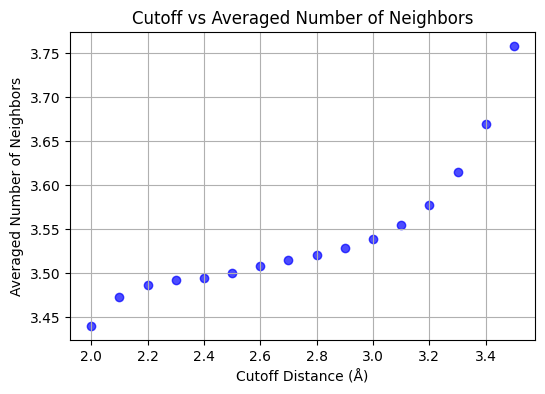

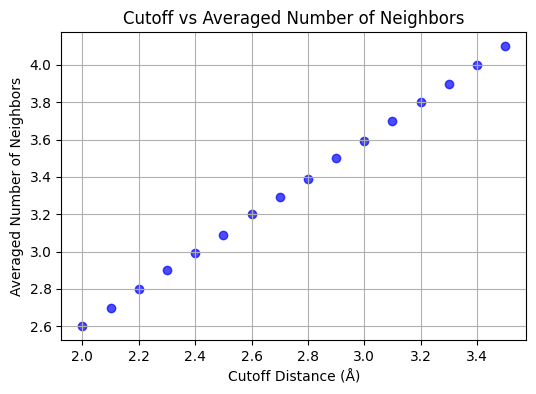

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from ase.neighborlist import NeighborList

def test_cutoff_values(Atoms, ovac_data, cutoff_range):
    average_neighbors = []
    max_dist_list = []

    for cutoff in cutoff_range:
        O_dictionary = enhanced_O_test(Atoms, ovac_data, cut=cutoff)
        # Calculate the average number of neighbors
        avg_nei = np.mean([info['nei'] for info in O_dictionary.values()])
        max_dist = np.max([info['max_dist'] for info in O_dictionary.values()])
        average_neighbors.append(avg_nei)
        max_dist_list.append(max_dist)
    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.scatter(cutoff_range, average_neighbors, color='blue', alpha=0.7)
    plt.title('Cutoff vs Averaged Number of Neighbors')
    plt.xlabel('Cutoff Distance (Å)')
    plt.ylabel('Averaged Number of Neighbors')
    plt.grid(True)
    plt.show()
    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.scatter(cutoff_range, max_dist_list, color='blue', alpha=0.7)
    plt.title('Cutoff vs Averaged Number of Neighbors')
    plt.xlabel('Cutoff Distance (Å)')
    plt.ylabel('Averaged Number of Neighbors')
    plt.grid(True)
    plt.show()
# Define the range of cutoff values to test
cutoff_range = np.arange(2, 3.6, 0.1)

# Call the function with the desired range
test_cutoff_values(mace, ovac_data, cutoff_range)

 max_dist 2.5860304206704026
 max_dist 2.5032984730076464
 max_dist 2.8589210462398844
 max_dist 2.637729836870031
 max_dist 3.060959766186157
 max_dist 2.5092831442877666
 max_dist 2.5735685419772367
 max_dist 3.086649079946215
 max_dist 2.540907962981125
 max_dist 3.071495953372794
 max_dist 2.551651859152685
 max_dist 2.5963358070550027
 max_dist 2.7735315515020558
 max_dist 2.501204996875694
 max_dist 2.549623612093142
 max_dist 3.0742542841830147
 max_dist 2.517478631756429
 max_dist 2.507436428324201
 max_dist 2.578946617954957
 max_dist 2.9125478661221784
 max_dist 2.5689055237628615
 max_dist 2.5177438647632364
 max_dist 2.5068773517199046
 max_dist 2.663671120429936
 max_dist 2.6595181325432726
 max_dist 2.604493838136394
 max_dist 2.509767304959857
 max_dist 2.738769147092311
 max_dist 2.537396464975867
 max_dist 2.5083624159223223
 max_dist 2.546512238112231
 max_dist 2.620493477646803
 max_dist 2.5458759896551473
 max_dist 2.5432631279934026
 max_dist 2.552432969764722
 max

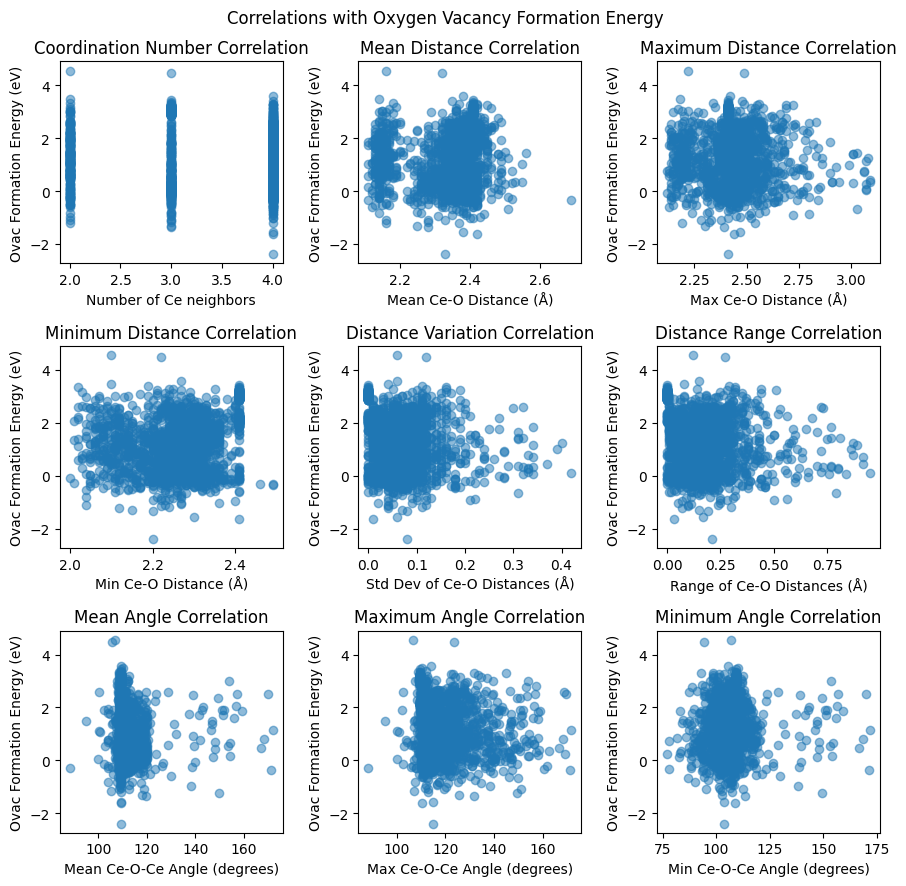

In [86]:
import matplotlib.pyplot as plt
def calculate_angles(center_pos, neighbor_positions):
    """Calculate all possible angles between neighbors through the center atom"""
    angles = []
    n = len(neighbor_positions)
    for i in range(n):
        for j in range(i+1, n):
            # Get vectors from center to neighbors
            vec1 = neighbor_positions[i] - center_pos
            vec2 = neighbor_positions[j] - center_pos
            
            # Calculate angle using dot product
            cos_angle = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
            # Ensure numerical stability
            cos_angle = np.clip(cos_angle, -1.0, 1.0)
            angle = np.degrees(np.arccos(cos_angle))
            angles.append(angle)
    return angles
def enhanced_O_information(Atoms, ovac_data, cut=2.5):
    # Create a neighbor list with fixed cutoff
    nl = NeighborList([cut/2] * len(Atoms), self_interaction=False, bothways=True)
    nl.update(Atoms)
    
    # Get indices for O atoms
    O_indices = [atom.index for atom in Atoms if atom.symbol == 'O']
    
    O_dictionary = {}
    count = 0

    for o_index in O_indices:
        # Get neighbors considering PBC
        indices, offsets = nl.get_neighbors(o_index)
        
        # Filter only Ce neighbors
        ce_neighbors = [i for i in indices if Atoms[i].symbol == 'Ce']
        
        # Get positions and distances with proper PBC handling
        o_pos = Atoms[o_index].position
        neighbor_positions = []
        distances = []
        
        for nei_idx, offset in zip(indices, offsets):
            if Atoms[nei_idx].symbol == 'Ce':
                # Get neighbor position with PBC offset
                nei_pos = Atoms[nei_idx].position + np.dot(offset, Atoms.get_cell())
                dist = np.linalg.norm(nei_pos - o_pos)
                neighbor_positions.append(nei_pos)
                distances.append(dist)
        # Calculate statistics
        bond_num = len(ce_neighbors)
        if distances:
            mean_dist = np.mean(distances)
            max_dist = np.max(distances)
            min_dist = np.min(distances)
            std_dist = np.std(distances)
            if max_dist > cut:
                print(' max_dist', max_dist)
                count += 1
        else:
            mean_dist = max_dist = min_dist = std_dist = None
            
        ovac_energy = ovac_data.get(o_index, {}).get('ovacform', None)
        
        # Add angle calculations
        angles = []
        if len(neighbor_positions) >= 2:  # Need at least 2 neighbors to form an angle
            angles = calculate_angles(o_pos, np.array(neighbor_positions))
            mean_angle = np.mean(angles) if angles else None
            max_angle = np.max(angles) if angles else None
            min_angle = np.min(angles) if angles else None
            std_angle = np.std(angles) if angles else None
        else:
            mean_angle = max_angle = min_angle = std_angle = None
        
        O_dictionary[o_index] = {
            "o": np.round(o_pos, 2),
            "nei": bond_num,
            "nei_index": ce_neighbors,
            "nei_positions": [np.round(pos, 2) for pos in neighbor_positions],
            "ovac_energy": ovac_energy,
            "mean_dist": np.round(mean_dist, 2) if mean_dist is not None else None,
            "max_dist": np.round(max_dist, 2) if max_dist is not None else None,
            "min_dist": np.round(min_dist, 2) if min_dist is not None else None,
            "std_dist": np.round(std_dist, 2) if std_dist is not None else None,
            "angles": angles,
            "mean_angle": np.round(mean_angle, 2) if mean_angle is not None else None,
            "max_angle": np.round(max_angle, 2) if max_angle is not None else None,
            "min_angle": np.round(min_angle, 2) if min_angle is not None else None,
            "std_angle": np.round(std_angle, 2) if std_angle is not None else None
        }
    print('count', count)
    return O_dictionary
# Create enhanced dictionary
enhanced_O_dict = enhanced_O_information(mace, ovac_data)

plot_data = {
    'nei_count': [],
    'mean_dist': [],
    'max_dist': [],
    'min_dist': [],
    'std_dist': [],
    'ovac_energy': [],
    'mean_angle': [],
    'max_angle': [],
    'min_angle': [],
    'std_angle': []
}

# First, collect all data points that have both angle and energy information
for o_info in enhanced_O_dict.values():
    if o_info['ovac_energy'] is not None and o_info['mean_angle'] is not None:
        plot_data['nei_count'].append(o_info['nei'])
        plot_data['mean_dist'].append(o_info['mean_dist'])
        plot_data['max_dist'].append(o_info['max_dist'])
        plot_data['min_dist'].append(o_info['min_dist'])
        plot_data['std_dist'].append(o_info['std_dist'])
        plot_data['ovac_energy'].append(o_info['ovac_energy'])
        plot_data['mean_angle'].append(o_info['mean_angle'])
        plot_data['max_angle'].append(o_info['max_angle'])
        plot_data['min_angle'].append(o_info['min_angle'])
        plot_data['std_angle'].append(o_info['std_angle'])

# Create subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(9, 9))
fig.suptitle('Correlations with Oxygen Vacancy Formation Energy')

# Plot 1: Number of neighbors vs Ovac Energy
ax1.scatter(plot_data['nei_count'], plot_data['ovac_energy'], alpha=0.5)
ax1.set_xlabel('Number of Ce neighbors')
ax1.set_ylabel('Ovac Formation Energy (eV)')
ax1.set_title('Coordination Number Correlation')

# Plot 2: Mean distance vs Ovac Energy
ax2.scatter(plot_data['mean_dist'], plot_data['ovac_energy'], alpha=0.5)
ax2.set_xlabel('Mean Ce-O Distance (Å)')
ax2.set_ylabel('Ovac Formation Energy (eV)')
ax2.set_title('Mean Distance Correlation')

# Plot 3: Max distance vs Ovac Energy
ax3.scatter(plot_data['max_dist'], plot_data['ovac_energy'], alpha=0.5)
ax3.set_xlabel('Max Ce-O Distance (Å)')
ax3.set_ylabel('Ovac Formation Energy (eV)')
ax3.set_title('Maximum Distance Correlation')

# Plot 4: Min distance vs Ovac Energy
ax4.scatter(plot_data['min_dist'], plot_data['ovac_energy'], alpha=0.5)
ax4.set_xlabel('Min Ce-O Distance (Å)')
ax4.set_ylabel('Ovac Formation Energy (eV)')
ax4.set_title('Minimum Distance Correlation')

# Plot 5: Std distance vs Ovac Energy
ax5.scatter(plot_data['std_dist'], plot_data['ovac_energy'], alpha=0.5)
ax5.set_xlabel('Std Dev of Ce-O Distances (Å)')
ax5.set_ylabel('Ovac Formation Energy (eV)')
ax5.set_title('Distance Variation Correlation')

# Plot 6: (Max - Min) distance vs Ovac Energy
distance_range = [max_d - min_d for max_d, min_d in zip(plot_data['max_dist'], plot_data['min_dist'])]
ax6.scatter(distance_range, plot_data['ovac_energy'], alpha=0.5)
ax6.set_xlabel('Range of Ce-O Distances (Å)')
ax6.set_ylabel('Ovac Formation Energy (eV)')
ax6.set_title('Distance Range Correlation')

# Plot 7: Mean angle vs Ovac Energy
ax7.scatter(plot_data['mean_angle'], plot_data['ovac_energy'], alpha=0.5)
ax7.set_xlabel('Mean Ce-O-Ce Angle (degrees)')
ax7.set_ylabel('Ovac Formation Energy (eV)')
ax7.set_title('Mean Angle Correlation')

# Plot 8: Max angle vs Ovac Energy
ax8.scatter(plot_data['max_angle'], plot_data['ovac_energy'], alpha=0.5)
ax8.set_xlabel('Max Ce-O-Ce Angle (degrees)')
ax8.set_ylabel('Ovac Formation Energy (eV)')
ax8.set_title('Maximum Angle Correlation')

# Plot 9: Min angle vs Ovac Energy
ax9.scatter(plot_data['min_angle'], plot_data['ovac_energy'], alpha=0.5)
ax9.set_xlabel('Min Ce-O-Ce Angle (degrees)')
ax9.set_ylabel('Ovac Formation Energy (eV)')
ax9.set_title('Minimum Angle Correlation')

plt.tight_layout()
plt.show()

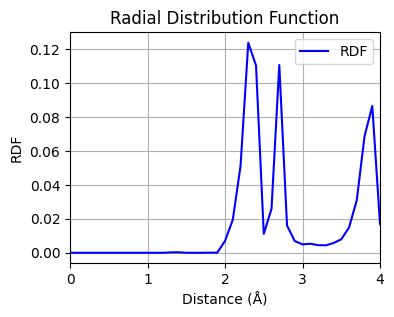

In [71]:
from ase.neighborlist import NeighborList
from ase import units
import numpy as np
import matplotlib.pyplot as plt

def calculate_rdf(Atoms, r_max=10.0, bin_width=0.1):
    # Create a neighbor list
    nl = NeighborList(cutoffs=[r_max] * len(Atoms), self_interaction=False)
    nl.update(Atoms)

    # Define bins for the RDF
    bins = np.arange(0, r_max + bin_width, bin_width)
    rdf = np.zeros(len(bins) - 1)

    # Count neighbors in each bin
    for i, atom in enumerate(Atoms):
        indices, offsets = nl.get_neighbors(i)
        distances = np.linalg.norm(Atoms.positions[indices] - atom.position, axis=1)

        # Increment the RDF counts
        for d in distances:
            if d < r_max:
                bin_index = int(d / bin_width)
                rdf[bin_index] += 1

    # Normalize the RDF
    volume = (4/3) * np.pi * (bins[1:]**3 - bins[:-1]**3)
    rdf /= volume * len(Atoms)  # Normalize by number of atoms and volume

    return bins[:-1], rdf

# Calculate RDF for the mace structure
bins, rdf = calculate_rdf(mace)

# Plot the RDF
plt.figure(figsize=(4, 3))
plt.xlim(0,4)
plt.plot(bins, rdf, label='RDF', color='blue')
plt.title('Radial Distribution Function')
plt.xlabel('Distance (Å)')
plt.ylabel('RDF')
plt.legend()
plt.grid()
plt.show()


In [18]:
import numpy as np
from scipy.spatial import distance
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def compute_tsne(data, method='cosine'):
    if method == 'cosine':
        # Calculate the cosine similarity matrix
        similarity_matrix = cosine_similarity(data)
        # Convert similarities to dissimilarities
        matrix = 1 - similarity_matrix
        matrix[matrix < 0] = 0  # Ensure no negative values
    elif method == 'euclidean':
        # Calculate the Euclidean distance matrix
        matrix = distance.squareform(distance.pdist(data, 'euclidean'))
        matrix[matrix < 0] = 0  # Ensure no negative values (not typically necessary)
    else:
        raise ValueError("Unsupported method. Choose 'cosine' or 'euclidean'.")

    tsne = TSNE(n_components=2, metric='precomputed', init='random', random_state=0)
    tsne_coords = tsne.fit_transform(matrix)
    return tsne_coords

data = mace_soap[Ce_indices]  # Your SOAP descriptor data
tsne_coords_cosine = compute_tsne(data, method='cosine')
tsne_coords_euclidean = compute_tsne(data, method='euclidean')
data_o = mace_soap[O_indices]  # Your SOAP descriptor data
tsne_coords_cosine_o = compute_tsne(data_o, method='cosine')
tsne_coords_euclidean_o = compute_tsne(data_o, method='euclidean')


In [56]:
print(len(O_dictionary))

2446


AttributeError: 'dict' object has no attribute 'shape'

In [53]:
ovac_e=[]
for i,(o_index, info) in enumerate(ovac_data.items()):
    ovac_e.append(info['ovacform'])

In [55]:
print(len(ovac_e))

2446


2446
2446


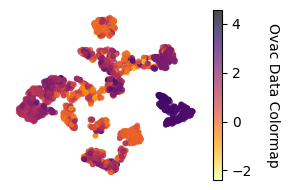

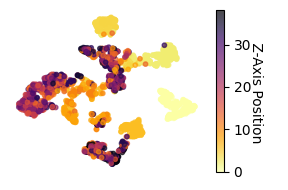

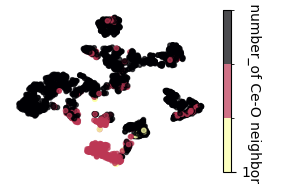

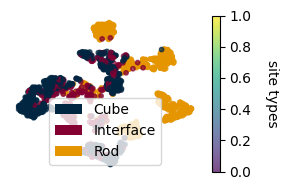

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import Normalize, BoundaryNorm, ListedColormap
from sklearn.cluster import KMeans
from matplotlib.patches import Patch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding
from matplotlib.patches import Patch


# Load the ovac_data
file_name = '../../resources/hist_dict_final.pkl'
with open(file_name, 'rb') as f:
    ovac_data = pickle.load(f)

def categorize_positions(dictionary,indices,atomtype):
    categories = []
    for index in indices:
        position = dictionary[index][atomtype]
        if position[2] > 14:
            categories.append('cube')
        elif 6 < position[2] < 14 and 10 < position[1] < 48 and 10 < position[0] < 48:
            categories.append('interface')
        else:
            categories.append('rod')
    return categories

def visualize_with_tsne(tsne_coords, data, plot_type='colors', title='', interval=5, categories=None):
    plt.figure(figsize=(3, 2))
    ax = plt.gca()  # Get the current axes instance
    cmap = plt.get_cmap('inferno_r')  # Modified to use plt.get_cmap()

    if plot_type == 'colors':
        scatter = ax.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=data, cmap=cmap, s=10, alpha=0.7)
        cbar = plt.colorbar(scatter)
        cbar.set_label(title, rotation=270, labelpad=20)
    elif plot_type == 'values':
        min_val = int(np.floor(np.min(data)))
        max_val = int(np.ceil(np.max(data)))
        cmap = plt.get_cmap('inferno_r')  # Modified to use plt.get_cmap()
        bins = np.arange(min_val, max_val + 1)
        norm = BoundaryNorm(bins, cmap.N, clip=True)
        scatter = ax.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=data, s=10, cmap=cmap, norm=norm, alpha=0.7)
        tick_values = np.arange(min_val, max_val + 1, interval)
        cbar = plt.colorbar(scatter, ticks=tick_values)
        cbar.set_label(title, rotation=270, labelpad=20)
        cbar.ax.set_yticklabels([f'{int(tick)}' for tick in tick_values])
    elif plot_type == 'clustering' and categories is not None:
        colors2 = ['#840032', '#e59500', '#002642']
        category_to_color = {'cube': colors2[2], 'interface': colors2[0], 'rod': colors2[1]}
        colors = [category_to_color[cat] for cat in categories]
        scatter = ax.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=colors, s=10, alpha=0.7)
        legend_elements = [Patch(facecolor=colors2[2], label='Cube'),
                           Patch(facecolor=colors2[0], label='Interface'),
                           Patch(facecolor=colors2[1], label='Rod')]
        plt.legend(handles=legend_elements)
        cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
        cbar.set_label(title, rotation=270, labelpad=20)
    elif plot_type == 'ovac' and data is not None:  # New plot type for ovac_data
        print(len(ovac_e))
        print(len(tsne_coords[:, 0]))

        scatter = ax.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=ovac_e, s=10, cmap=cmap, alpha=0.7)
        cbar = plt.colorbar(scatter)
        cbar.set_label(title, rotation=270, labelpad=20)

    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.xticks([])
    plt.yticks([])
    ax.set_frame_on(False)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


k = 6  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(data)
colors = plt.cm.inferno_r(cluster_labels.astype(float) / k)  # Color by cluster label

z_positions = [O_dictionary[index]['o'][2] for index in O_indices]
nei_colors = [O_dictionary[index]['nei'] for index in O_indices]
categories = categorize_positions(O_dictionary,O_indices,'o')

#visualize_with_tsne(tsne_coords_cosine, z_positions, plot_type='colors', title='\n Z-Axis Position')
#visualize_with_tsne(tsne_coords_cosine, nei_colors, plot_type='values', title='\n number_of Ce-O neighbor')
#visualize_with_tsne(tsne_coords_cosine, colors, plot_type='clustering', title=f'k means k={k} cosine', categories=categories)

visualize_with_tsne(tsne_coords_cosine_o, ovac_data, plot_type='ovac', title='Ovac Data Colormap')
visualize_with_tsne(tsne_coords_cosine_o, z_positions, plot_type='colors', title='\n Z-Axis Position')
visualize_with_tsne(tsne_coords_cosine_o, nei_colors, plot_type='values', title='\n number_of Ce-O neighbor')
visualize_with_tsne(tsne_coords_cosine_o, colors, plot_type='clustering', title=f'site types', categories=categories)

In [62]:
Ce_dictionary

{0: {'ce': array([3.94, 0.  , 1.97]), 'nei': 4, 'nei_index': [3, 1, 0, 83]},
 1: {'ce': array([ 3.94, -0.  ,  5.6 ]), 'nei': 3, 'nei_index': [2, 1, 82]},
 2: {'ce': array([1.97, 2.79, 0.  ]), 'nei': 5, 'nei_index': [6, 5, 3, 0, 86]},
 3: {'ce': array([1.97, 2.78, 3.97]),
  'nei': 7,
  'nei_index': [7, 2, 5, 4, 3, 1, 87]},
 12: {'ce': array([3.94, 5.57, 1.97]),
  'nei': 8,
  'nei_index': [5, 9, 86, 87, 85, 11, 8, 91]},
 13: {'ce': array([3.93, 5.57, 5.6 ]),
  'nei': 6,
  'nei_index': [10, 4, 9, 87, 90, 84]},
 14: {'ce': array([1.97, 8.36, 0.  ]),
  'nei': 5,
  'nei_index': [11, 8, 14, 13, 94]},
 15: {'ce': array([1.96, 8.36, 3.96]),
  'nei': 7,
  'nei_index': [10, 9, 11, 12, 95, 13, 15]},
 24: {'ce': array([ 3.94, 11.14,  1.97]),
  'nei': 8,
  'nei_index': [19, 17, 95, 13, 94, 16, 93, 99]},
 25: {'ce': array([ 3.92, 11.14,  5.6 ]),
  'nei': 6,
  'nei_index': [17, 18, 12, 95, 92, 98]},
 26: {'ce': array([ 1.97, 13.93,  0.  ]),
  'nei': 5,
  'nei_index': [19, 16, 22, 21, 102]},
 27: {'ce'

In [63]:
O_dictionary

{4: {'o': array([3.94, 1.39, 0.  ]), 'nei': 3, 'nei_index': [0, 2, 42]},
 5: {'o': array([3.94, 1.39, 3.88]), 'nei': 4, 'nei_index': [0, 3, 1, 43]},
 6: {'o': array([1.97, 1.29, 5.75]), 'nei': 2, 'nei_index': [3, 1]},
 7: {'o': array([1.97, 1.39, 1.97]), 'nei': 3, 'nei_index': [0, 2, 3]},
 8: {'o': array([1.97, 4.28, 5.75]), 'nei': 2, 'nei_index': [3, 5]},
 9: {'o': array([1.97, 4.18, 1.97]), 'nei': 3, 'nei_index': [4, 2, 3]},
 10: {'o': array([0.  , 4.18, 0.  ]), 'nei': 1, 'nei_index': [2]},
 11: {'o': array([0.  , 4.18, 3.88]), 'nei': 1, 'nei_index': [3]},
 16: {'o': array([3.94, 6.96, 0.  ]), 'nei': 3, 'nei_index': [4, 6, 46]},
 17: {'o': array([3.94, 6.96, 3.87]), 'nei': 4, 'nei_index': [4, 5, 47, 7]},
 18: {'o': array([1.97, 6.86, 5.75]), 'nei': 2, 'nei_index': [5, 7]},
 19: {'o': array([1.97, 6.96, 1.97]), 'nei': 3, 'nei_index': [4, 6, 7]},
 20: {'o': array([1.97, 9.85, 5.75]), 'nei': 2, 'nei_index': [7, 9]},
 21: {'o': array([1.97, 9.75, 1.97]), 'nei': 3, 'nei_index': [6, 7, 8]}